<a href="https://colab.research.google.com/github/Aaron-anayst/Twitter-Data-Analysis/blob/main/Extract_entities_from_economomic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
from google.colab import drive
drive.mount('/content/drive/')
#To Change my directory

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [106]:
pip install advertools

In [107]:
%config InlineBackend.figure_format = 'retina' # high resolution plotting
import matplotlib.pyplot as plt
import pandas as pd
import json
import advertools as adv
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 280)
adv.__version__

'0.13.0'

In [108]:
!unzip '/content/drive/MyDrive/Twitter-Data-Analysis-main/data/Economic_Twitter_Data.zip'

Archive:  /content/drive/MyDrive/Twitter-Data-Analysis-main/data/Economic_Twitter_Data.zip
  inflating: Economic_Twitter_Data.json  


In [109]:
%cd /content/drive/MyDrive/Twitter-Data-Analysis/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Twitter-Data-Analysis/'
/content/drive/MyDrive/Twitter-Data-Analysis-main/data


In [110]:
ls


Economic_Twitter_Data.json  Economic_Twitter_Data.zip  merged-ke-ng-sa.zip


In [111]:
tweets_users_df = pd.read_json('/content/Economic_Twitter_Data.json',lines=True )
print(tweets_users_df.shape)
tweets_users_df.head(3)

(24625, 30)


,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,2022-04-22 22:20:18+00:00,1517629396575784961,1517629396575784960,"RT @nikitheblogger: Irre: Annalena Baerbock sagt, es bricht ihr das Herz, dass man nicht bedingungslos schwere Waffen liefert.\nMir bricht e…",False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nikitheblogger', 'name': 'Neverforgetniki', 'id': 809188392089092097, 'id_str': '809188392089092097', 'indices': [3, 18]}], 'urls': []}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,NaN,NaN,NaN,None,"{'id': 1487174445248692233, 'id_str': '1487174445248692233', 'name': 'MC', 'screen_name': 'McMc74078966', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3, 'friends_count': 12, 'listed_count': ...",None,None,None,NaN,"{'created_at': 'Fri Apr 22 14:38:54 +0000 2022', 'id': 1517513278620147717, 'id_str': '1517513278620147717', 'text': 'Irre: Annalena Baerbock sagt, es bricht ihr das Herz, dass man nicht bedingungslos schwere Waffen liefert. Mir bric… https://t.co/1dSS6HdHBE', 'truncated': Tr...",False,355,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-04-22 22:19:16+00:00,1517629134012399616,1517629134012399616,"RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 Million ""Flüchtlinge"" durchzufüttern, jedoch nicht nach 16 Jahren 1 Million Rentner aus der Ar…",False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'sagt_mit', 'name': 'Sie sagt es mit Bildern', 'id': 1511959918777184256, 'id_str': '1511959918777184256', 'indices': [3, 12]}], 'urls': []}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,NaN,NaN,NaN,None,"{'id': 1487174445248692233, 'id_str': '1487174445248692233', 'name': 'MC', 'screen_name': 'McMc74078966', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3, 'friends_count': 12, 'listed_count': ...",None,None,None,NaN,"{'created_at': 'Thu Apr 21 15:44:41 +0000 2022', 'id': 1517167446221852672, 'id_str': '1517167446221852672', 'text': 'Merkel schaffte es in 1 Jahr 1 Million ""Flüchtlinge"" durchzufüttern, jedoch nicht nach 16 Jahren 1 Million Rentner aus der Armut zu holen.', 'truncated': Fals...",False,505,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-04-22 22:17:28+00:00,1517628682659106822,1517628682659106816,"RT @Kryptonoun: @WRi007 Pharma in Lebensmitteln, Trinkwasser, in der Luft oder in der Zahnpasta irgendwo muss ein Beruhigungsmittel bzw. Be…",False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Kryptonoun', 'name': 'Kryptoguru', 'id': 951051508321345536, 'id_str': '951051508321345536', 'indices': [3, 14]}, {'screen_name': 'WRi007', 'name': 'Wolfgang Berger', 'id': 1214543251283357696, 'id_str': '1214...","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,NaN,NaN,NaN,None,"{'id': 1487174445248692233, 'id_str': '1487174445248692233', 'name': 'MC', 'screen_name': 'McMc74078966', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3, 'friends_count': 12, 'listed_count': ...",None,None,None,NaN,"{'created_at': 'Thu Apr 21 09:46:16 +0000 2022', 'id': 1517077248817442816, 'id_str': '1517077248817442816', 'text': '@WRi007 Pharma in Lebensmitteln, Trinkwasser, in der Luft oder in der Zahnpasta irgendwo muss ein Beruhigungsmittel… https://t.co/MQvSmEsmnY', 'truncated': Tr...",False,4,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
[x for x in dir(adv) if x.startswith('extract')]  # currently available extract functions

['extract',
 'extract_currency',
 'extract_emoji',
 'extract_exclamations',
 'extract_hashtags',
 'extract_intense_words',
 'extract_mentions',
 'extract_numbers',
 'extract_questions',
 'extract_urls',
 'extract_words']

In [113]:
hashtag_summary = adv.extract_hashtags(tweets_users_df['text'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [114]:
hashtag_summary['overview']

{'hashtags_per_post': 0.8183147208121827,
 'num_hashtags': 20151,
 'num_posts': 24625,
 'unique_hashtags': 5961}

In [115]:
hashtag_summary['hashtags'][:10]

[[],
 [],
 [],
 ['#deutschen', '#spritpreisen', '#inflation', '#abgaben'],
 [],
 [],
 ['#baerbock'],
 [],
 [],
 []]

In [116]:
hashtag_summary['hashtags_flat'][:10]

['#deutschen',
 '#spritpreisen',
 '#inflation',
 '#abgaben',
 '#baerbock',
 '#ichhabenichtmitgemacht',
 '#assange',
 '#assange',
 '#held',
 '#schwarzer']

In [117]:
hashtag_summary['hashtag_counts'][:20]

[0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0]

In [118]:
hashtag_summary['hashtag_freq'][:15]

[(0, 16268),
 (1, 3588),
 (2, 1902),
 (3, 1170),
 (4, 616),
 (5, 440),
 (6, 277),
 (7, 197),
 (8, 73),
 (9, 37),
 (10, 20),
 (11, 19),
 (12, 17),
 (14, 1)]

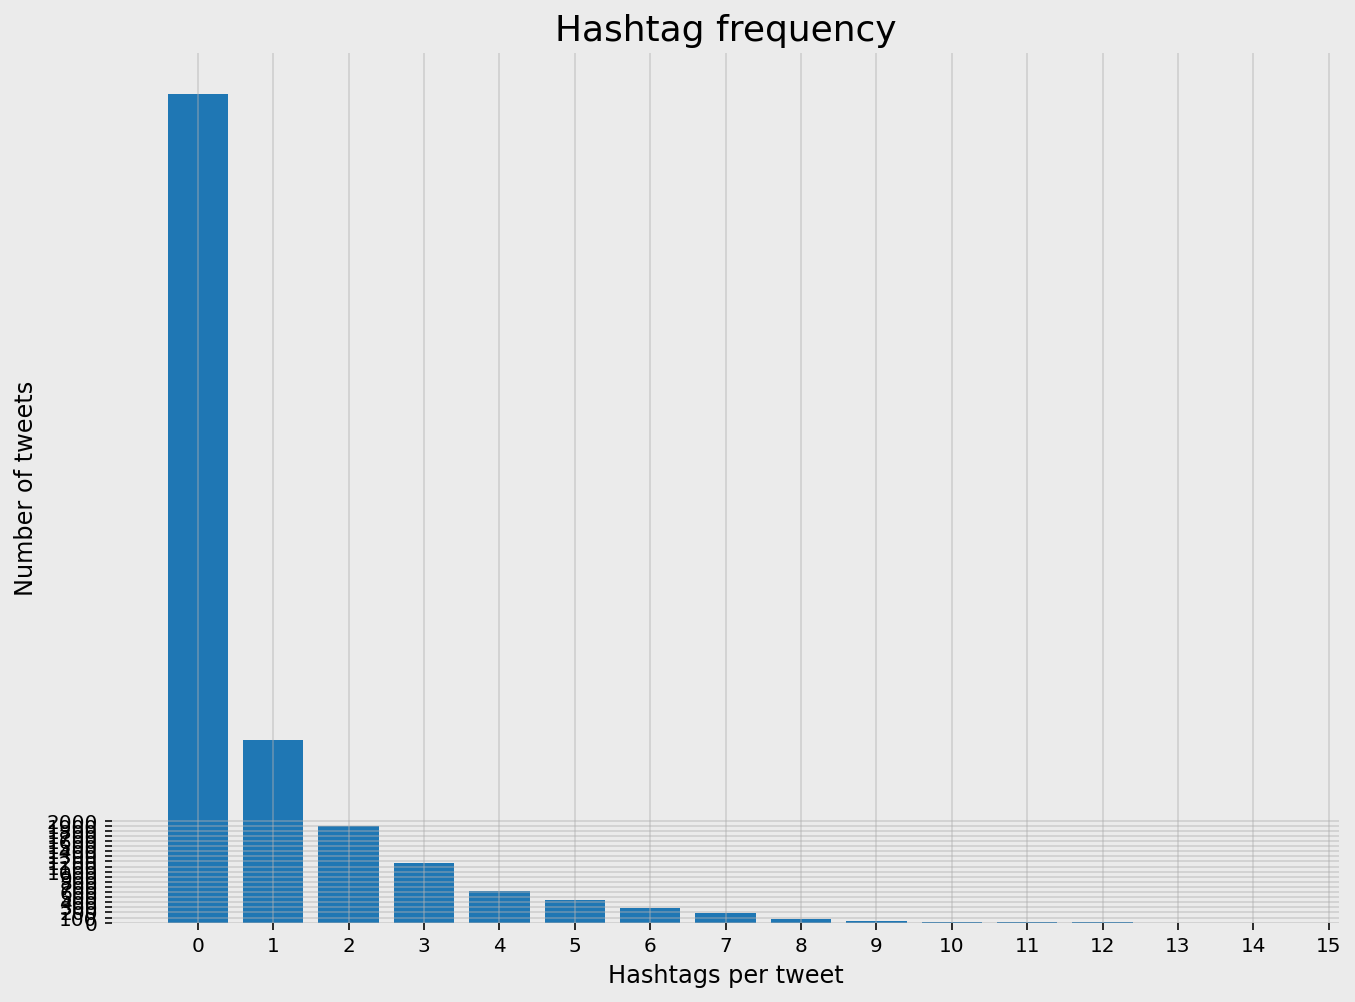

In [119]:
plt.figure(facecolor='#ebebeb', figsize=(11, 8))
plt.bar([x[0] for x in hashtag_summary['hashtag_freq'][:15]],
        [x[1] for x in hashtag_summary['hashtag_freq'][:15]])
plt.title('Hashtag frequency', fontsize=18)
plt.xlabel('Hashtags per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(16))
plt.yticks(range(0, 2100, 100))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [120]:
hashtag_summary['top_hashtags'][:10]

[('#marvininu', 412),
 ('#inflation', 255),
 ('#ukraine', 198),
 ('#marvin', 183),
 ('#srilanka', 153),
 ('#gold', 138),
 ('#crypto', 116),
 ('#india', 116),
 ('#lka', 115),
 ('#btc', 107)]

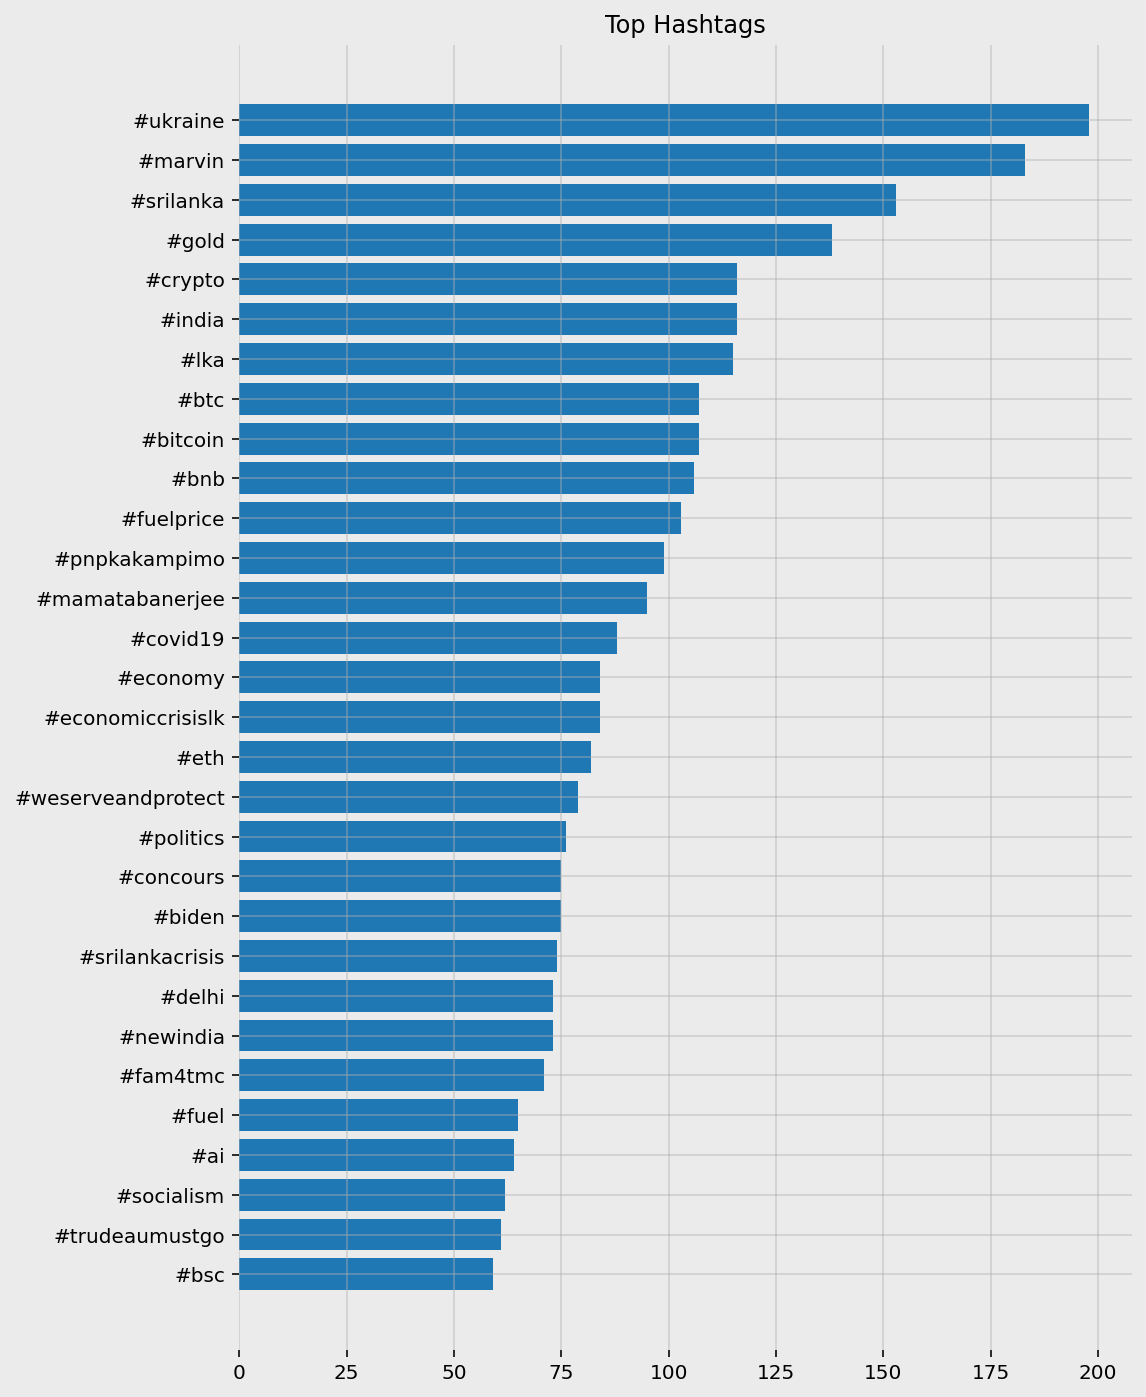

In [121]:
plt.figure(facecolor='#ebebeb', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

Emoji¶
You will see that the extract_emoji function is pretty much the same as extract_hashtags. The only difference is that it has emoji both as images and their textual counterparts.

In [122]:
emoji_summary = adv.extract_emoji(tweets_users_df['text'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [123]:
emoji_summary['overview']

{'emoji_per_post': 0.3725482233502538,
 'num_emoji': 9174,
 'num_posts': 24625,
 'unique_emoji': 718}

In [124]:
emoji_summary['emoji'][:20]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['⁉️', '❓', '⁉️', '👇'],
 ['😢', '🤢']]

In [125]:
emoji_summary['emoji_text'][:20]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['exclamation question mark',
  'red question mark',
  'exclamation question mark',
  'backhand index pointing down'],
 ['crying face', 'nauseated face']]

In [126]:
emoji_summary['emoji_flat'][:10]

['⁉️', '❓', '⁉️', '👇', '😢', '🤢', '‼️', '😠', '🙈', '🙊']

In [127]:
emoji_summary['emoji_flat_text'][:10]

['exclamation question mark',
 'red question mark',
 'exclamation question mark',
 'backhand index pointing down',
 'crying face',
 'nauseated face',
 'double exclamation mark',
 'angry face',
 'see-no-evil monkey',
 'speak-no-evil monkey']

In [128]:
list(zip(emoji_summary['emoji_flat'][:10], emoji_summary['emoji_flat_text'][:10]))

[('⁉️', 'exclamation question mark'),
 ('❓', 'red question mark'),
 ('⁉️', 'exclamation question mark'),
 ('👇', 'backhand index pointing down'),
 ('😢', 'crying face'),
 ('🤢', 'nauseated face'),
 ('‼️', 'double exclamation mark'),
 ('😠', 'angry face'),
 ('🙈', 'see-no-evil monkey'),
 ('🙊', 'speak-no-evil monkey')]

In [129]:
emoji_summary['emoji_counts'][:15]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [130]:
emoji_summary['emoji_freq'][:15]

[(0, 21238),
 (1, 1571),
 (2, 731),
 (3, 501),
 (4, 194),
 (5, 166),
 (6, 72),
 (7, 31),
 (8, 19),
 (9, 7),
 (10, 8),
 (11, 3),
 (12, 11),
 (13, 1),
 (14, 2)]

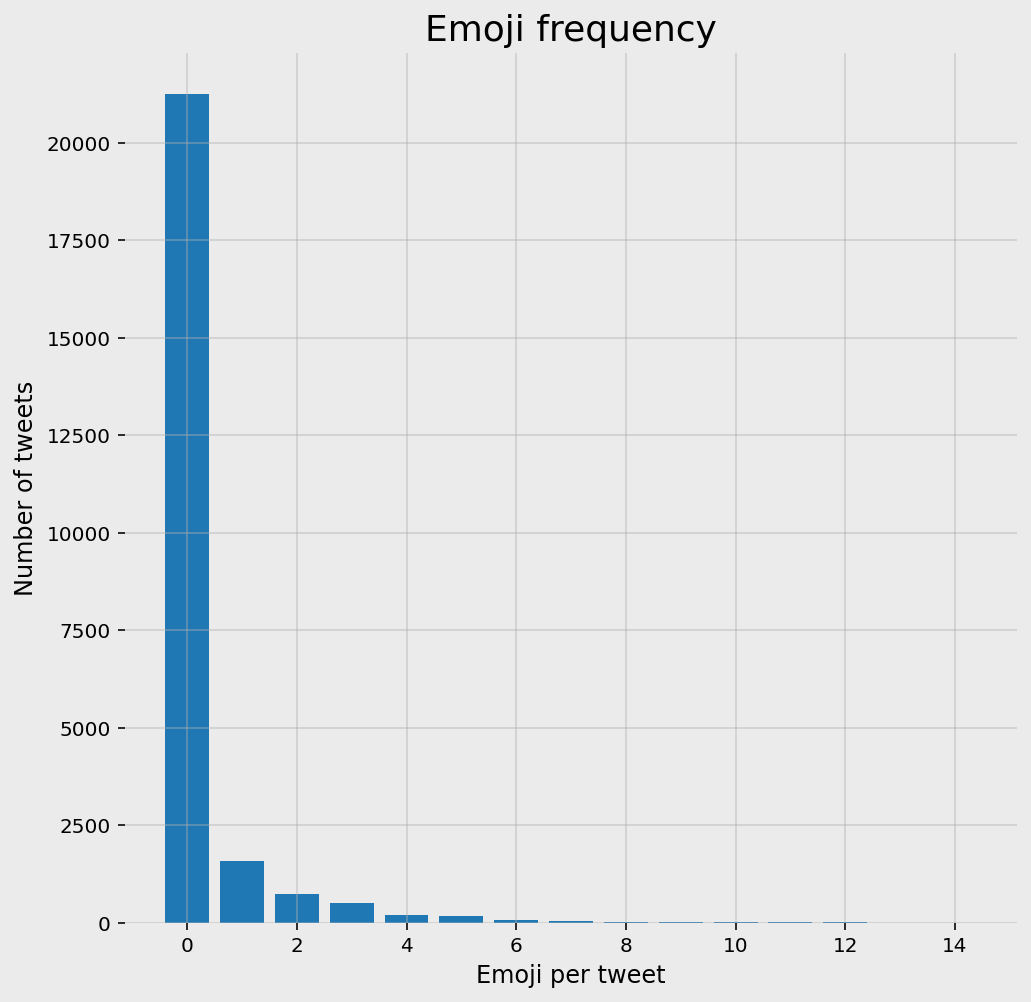

In [131]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in emoji_summary['emoji_freq'][:15]],
        [x[1] for x in emoji_summary['emoji_freq'][:15]])
plt.title('Emoji frequency', fontsize=18)
plt.xlabel('Emoji per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [132]:
emoji_summary['top_emoji'][:20]

[('\U0001f7e9', 641),
 ('⬜', 521),
 ('🤣', 496),
 ('🔥', 491),
 ('😂', 369),
 ('🚀', 252),
 ('\U0001f7e8', 230),
 ('👉', 216),
 ('🙏', 164),
 ('⬛', 157),
 ('❤️', 130),
 ('💥', 94),
 ('🐶', 90),
 ('👇', 88),
 ('🤔', 86),
 ('\U0001f7e2', 82),
 ('💰', 81),
 ('❗', 77),
 ('🎁', 74),
 ('👍', 69)]

In [133]:
emoji_summary['top_emoji_text'][:20]

[('green square', 641),
 ('white large square', 521),
 ('rolling on the floor laughing', 496),
 ('fire', 491),
 ('face with tears of joy', 369),
 ('rocket', 252),
 ('yellow square', 230),
 ('backhand index pointing right', 216),
 ('red heart', 187),
 ('folded hands', 164),
 ('black large square', 157),
 ('collision', 94),
 ('dog face', 90),
 ('backhand index pointing down', 88),
 ('thinking face', 86),
 ('green circle', 82),
 ('money bag', 81),
 ('red exclamation mark', 77),
 ('wrapped gift', 74),
 ('thumbs up', 69)]

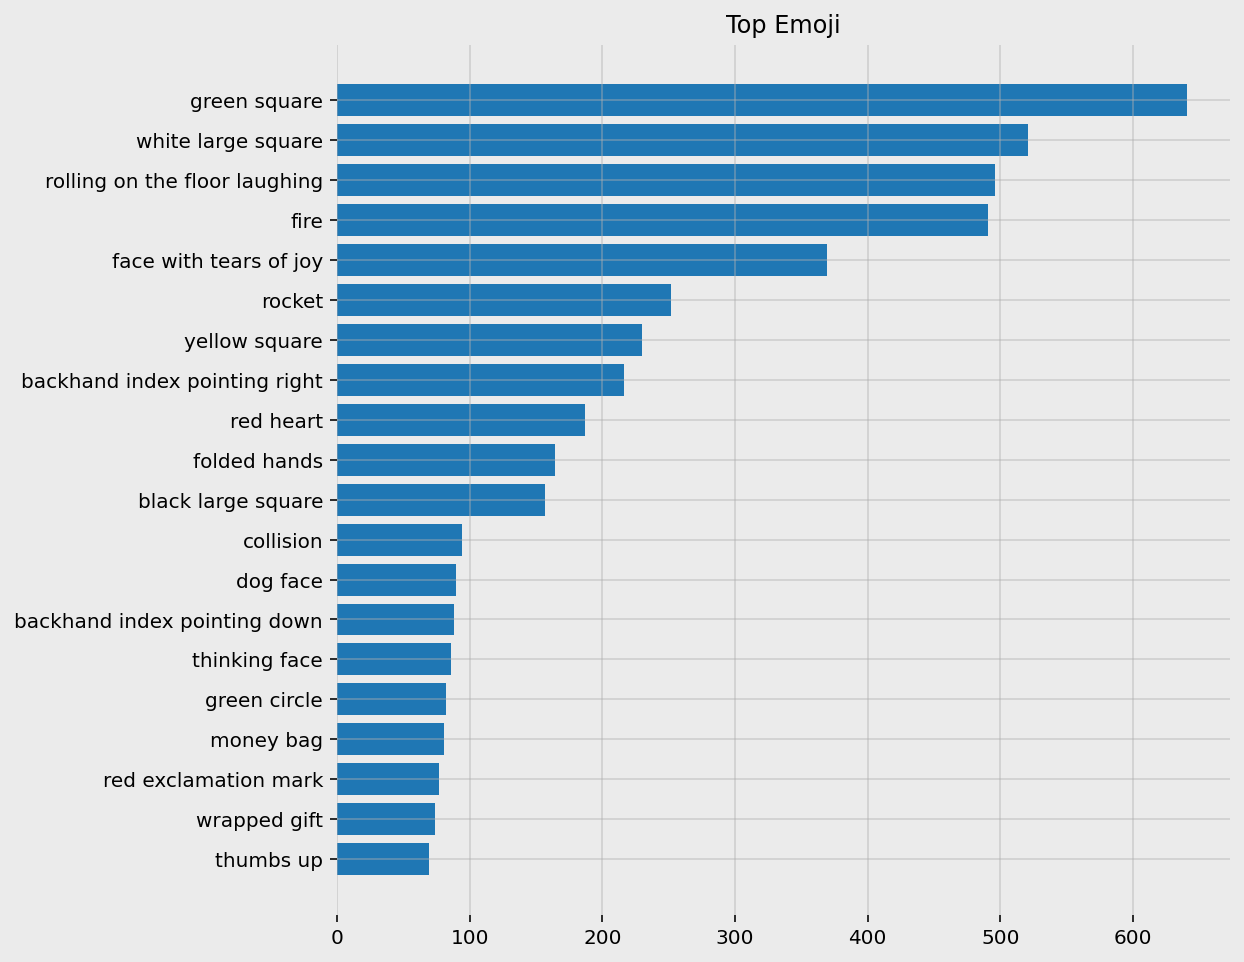

In [134]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

Mentions¶
Again, by now it should be familiar, and you will be able to guess the names of the keys and what they would produce.

In [135]:
mention_summary = adv.extract_mentions(tweets_users_df['text'])
mention_summary.keys()

dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [136]:
mention_summary['overview']

{'mentions_per_post': 1.1053807106598985,
 'num_mentions': 27220,
 'num_posts': 24625,
 'unique_mentions': 11485}

In [137]:
mention_summary['mentions'][:15]

[['@nikitheblogger'],
 ['@sagt_mit'],
 ['@kryptonoun', '@wri007'],
 ['@wri007'],
 ['@rolandtichy'],
 ['@biggyyyyyyy'],
 ['@siriablack_ii'],
 ['@darling_2022'],
 ['@rosenbusch_'],
 ['@kickout55711802'],
 ['@safka111'],
 ['@sagt_mit'],
 ['@ben_brechtken'],
 ['@nikitheblogger'],
 ['@siebziger69']]

In [138]:
mention_summary['mentions_flat'][:10]

['@nikitheblogger',
 '@sagt_mit',
 '@kryptonoun',
 '@wri007',
 '@wri007',
 '@rolandtichy',
 '@biggyyyyyyy',
 '@siriablack_ii',
 '@darling_2022',
 '@rosenbusch_']

In [139]:
mention_summary['mention_counts'][:20]

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [140]:
mention_summary['mention_freq'][:15]

[(0, 6531),
 (1, 12754),
 (2, 3468),
 (3, 1137),
 (4, 320),
 (5, 152),
 (6, 74),
 (7, 49),
 (8, 67),
 (9, 26),
 (10, 18),
 (11, 14),
 (12, 10),
 (13, 3),
 (14, 1)]

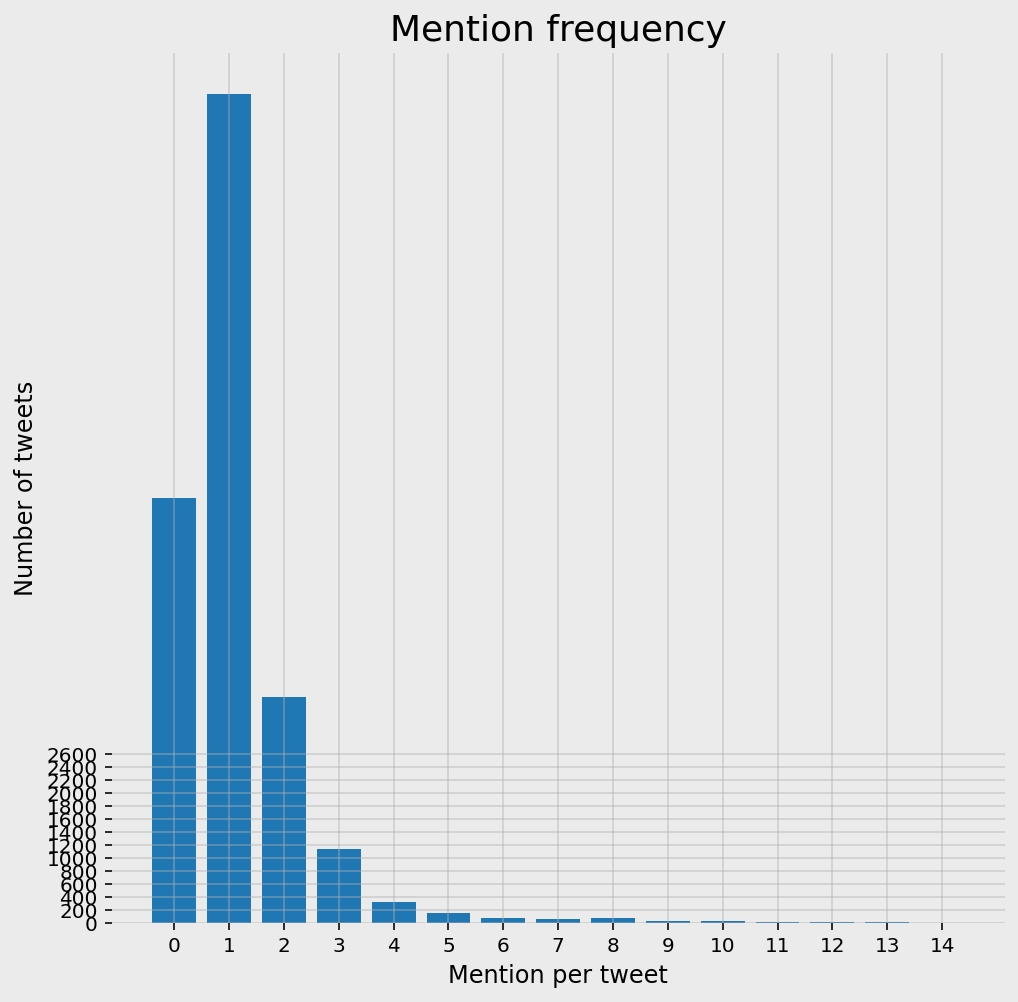

In [141]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in mention_summary['mention_freq'][:15]],
        [x[1] for x in mention_summary['mention_freq'][:15]])
plt.title('Mention frequency', fontsize=18)
plt.xlabel('Mention per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(15))
plt.yticks(range(0, 2800, 200))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [142]:
mention_summary['top_mentions'][:10]

[('@mamataofficial', 453),
 ('@aitcofficial', 391),
 ('@marvin_inu', 258),
 ('@etprime_com', 216),
 ('@narendramodi', 215),
 ('@abhishekaitc', 200),
 ('@elonmusk', 159),
 ('@bjp4india', 145),
 ('@janasenaparty', 133),
 ('@nadeeminc', 116)]

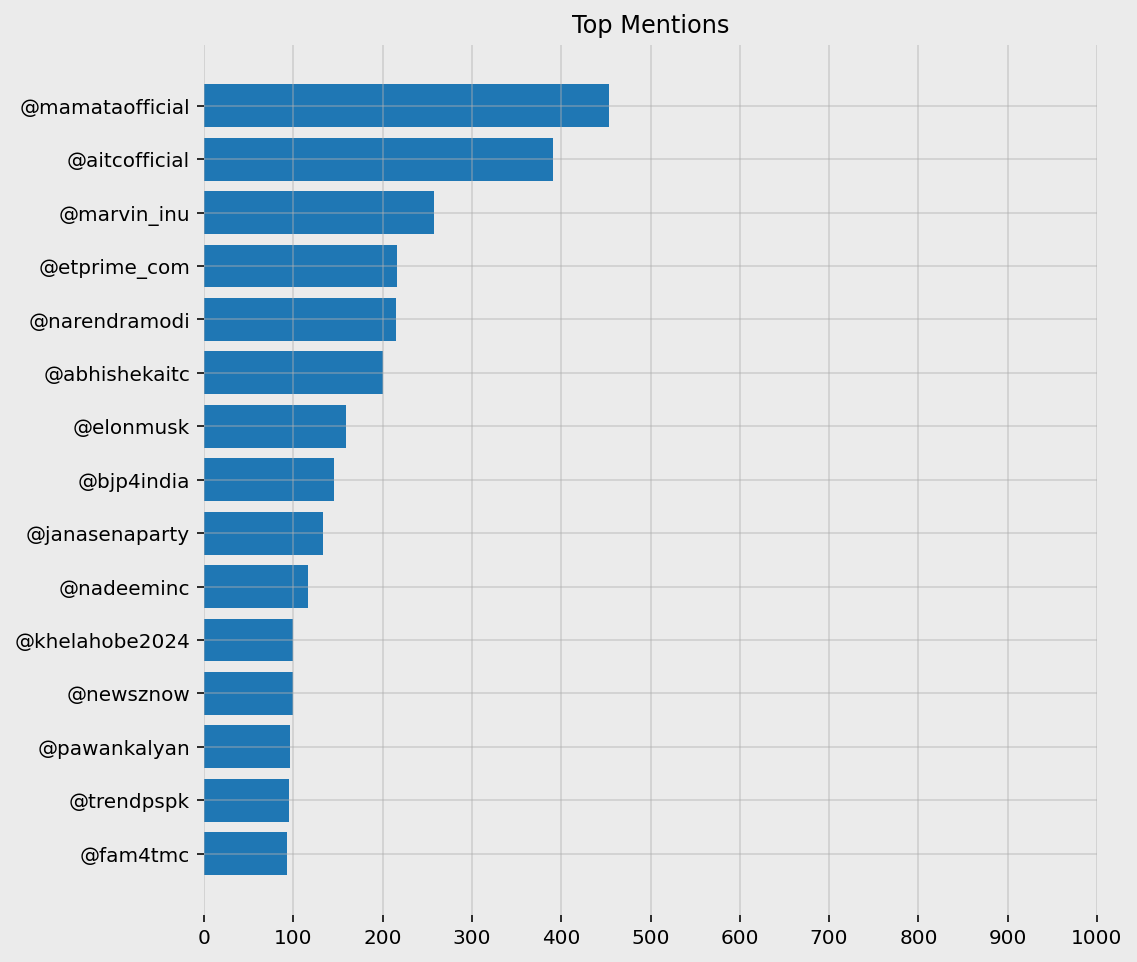

In [143]:
[('@nike', 964),
 ('@kaepernick7', 493),
 ('@realdonaldtrump', 412),
 ('@serenawilliams', 84),
 ('@nfl', 65),
 ('@youtube', 38),
 ('@corybooker', 36),
 ('@potus', 29),
 ('@kingjames', 27),
 ('@nflcommish', 21)]
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 1100, 100))
plt.gca().set_frame_on(False)

Questions

In [144]:
question_summary = adv.extract_questions(tweets_users_df['text'])

In [145]:
question_summary.keys()

dict_keys(['question_marks', 'question_marks_flat', 'question_mark_counts', 'question_mark_freq', 'top_question_marks', 'overview', 'question_mark_names', 'question_text'])

In [146]:
question_summary['overview']

{'num_posts': 24625,
 'num_question_marks': 2351,
 'question_marks_per_post': 0.09547208121827411,
 'unique_question_marks': 5}

In [147]:
question_summary['question_mark_freq']

[(0, 22716),
 (1, 1641),
 (2, 180),
 (3, 64),
 (4, 10),
 (5, 6),
 (6, 3),
 (9, 1),
 (12, 1),
 (15, 2),
 (19, 1)]

In [148]:
question_summary['top_question_marks'] # this is more interesting if you have questions in different languages where different question marks are used.

[('?', 2308), ('¿', 16), ('؟', 13), ('？', 9), ('⁉', 5)]

In [149]:
[(i,x) for i, x in  enumerate(question_summary['question_text']) if x][:15]

[(15, ['Geht es dem Journalistenpack nur noch um das Geld?']),
 (18, ['RT @Ira74448224: ⁉']),
 (29, ['damit wir wissen, was uns blüht?']),
 (33,
  ['RT @Kryptonoun: @argonerd Wieso grenzen Juden sich mit dem Wort Antisemitismus selber aus?',
   'Ist das nicht Rassismus?']),
 (34,
  ['RT @AntjeHermenau: Gibt es eigentlich Bundestagsabgeordnete, die Aktien von BionTech, Pfizer oder Moderna halten?']),
 (39,
  ['RT @MichaelAArouet: German 10y mortgage rate went from 0,8% to 2,50% 👇 Can you hear the sound of German real estate bubble bursting?']),
 (41, ['RT @goldseek: When?']),
 (43,
  ['RT @biancoresearch: Rates rise until something breaks … is anything broken yet?']),
 (51, ['RT @AndreasSteno: JAPANIFICATION OF YIELDS GONE?']),
 (90, ['COINCIDENCE?']),
 (101,
  ['MAYOR OF CRAZY TOWN: Why is the Easter Bunny directing Biden to do anything?']),
 (117, ['Biden’s Price Hike: You think it’s bad now?']),
 (143, ["RT @bwin_France: 🏆 Envie d'aller supporter l'OM en #UECL ?"]),
 (171,
  ['RT @bu

Intense words

In [150]:
intense_summary = adv.extract_intense_words(tweets_users_df['text'], min_reps=3)

In [151]:
intense_summary['overview']

{'intense_words_per_post': 0.10749238578680204,
 'num_intense_words': 2647,
 'num_posts': 24625,
 'unique_intense_words': 1697}

In [152]:
intense_summary['top_intense_words'][:20]

[('...', 94),
 ('\U0001f7e9\U0001f7e9\U0001f7e9\U0001f7e9\U0001f7e9', 66),
 ('👉👉👉', 57),
 ('1000', 33),
 ('#1000xgem', 32),
 ('!!!', 20),
 ('🤣🤣🤣', 18),
 ('leaders...in', 17),
 ('$QQQ', 15),
 ('000', 15),
 ('😂😂😂', 15),
 ('🚀🚀🚀', 12),
 ('⬜⬜⬜⬜⬜', 12),
 ('???', 11),
 ('200,000', 9),
 ('....', 9),
 ('🔥🔥🔥', 9),
 ('⬜\U0001f7e8⬜⬜⬜', 9),
 ('2000', 8),
 ('🤣🤣🤣🤣🤣', 8)]

In [153]:
currency_summary = adv.extract_currency(tweets_users_df['text'])

In [154]:
currency_summary.keys()

dict_keys(['currency_symbols', 'currency_symbols_flat', 'currency_symbol_counts', 'currency_symbol_freq', 'top_currency_symbols', 'overview', 'currency_symbol_names', 'surrounding_text'])

In [155]:
currency_summary['overview']

{'currency_symbols_per_post': 0.06773604060913706,
 'num_currency_symbols': 1668,
 'num_posts': 24625,
 'unique_currency_symbols': 7}

In [156]:
currency_summary['top_currency_symbols']

[('$', 1427), ('€', 145), ('₹', 48), ('£', 43), ('₿', 3), ('฿', 1), ('￥', 1)]

In [157]:
[x for x in currency_summary['surrounding_text'] if x][:20]

[[' im Wagen sind 75,00€. Mir ist schlecht. '],
 ['ces will hover near $100/bbl, which means'],
 ['YOUR DIME: ICE blew $17M on unused hotel '],
 ['c university to pay $400,000 in damages a'],
 [' doughnut prices to $4.11 average gas pri'],
 [' carte cadeau de 100€ sur Nike 🛍'],
 ['dinFinancial | FORK $TITANO'],
 ['l, on vous offre 250$ !'],
 ['2x 150$ en #SOL'],
 ['🔥 86.50€ AU LIEU DE 173€ 🔥'],
 ['🎁 100 $ '],
 ['ous fait gagner 5x10€ de fre…'],
 [' stole an estimated $300 billion of U.S. '],
 ['united states $4.77 billion', 'estonia $0.24b', 'uk $0.…'],
 ['rendapotterr: 🙏Just $100 left on Mutual A', '🙏$100 Groceries for Fa'],
 ['🙏$150 Groceries for…'],
 ['🙏$200 Groc…'],
 ['🙏$340 Groc…'],
 ['🙏$440 Groceries for Fa'],
 ['🙏$440 Groceries for Fa']]

##Arbitrary Words

In [158]:
word_summary = adv.extract_words(tweets_users_df['text'], 
                                 words_to_extract=['sport', 'football', 'athlet',],
                                 entire_words_only=False) # when set to False, it extracts the words and show how they appear within a larger word if any
                                                          # if set to True, is only extracts the exact words specified only if they appear as entire words

In [159]:
word_summary.keys()

dict_keys(['words', 'words_flat', 'word_counts', 'word_freq', 'top_words', 'overview'])

In [93]:
word_summary['overview']

{'num_posts': 24625,
 'num_words': 218,
 'unique_words': 83,
 'words_per_post': 0.008852791878172589}

In [94]:
word_summary['top_words'][:20]

[('football', 26),
 ('transport', 14),
 ('sports', 13),
 ('@dhfootballclub:', 12),
 ('sport', 10),
 ('@trollfootball:', 8),
 ('@itgdsports:', 8),
 ('transportation', 6),
 ('@tomcuddysports:', 6),
 ('passport', 5),
 ('#football', 5),
 ('#sportsupdate', 4),
 ('#transportation', 4),
 ('@ecrirelesport:', 3),
 ('@ecrirelesport', 3),
 ('@jabaribrisport:', 3),
 ('@purelyfootball', 3),
 ('#sports', 3),
 ('@talksport', 3),
 ('@parionssport:', 2)]

In [96]:
word_summary_politics = adv.extract_words(tweets_users_df['text'],
                                          ['politic', 'polic', 'trump', 'donald'])

In [97]:
word_summary_politics['overview']

{'num_posts': 24625,
 'num_words': 789,
 'unique_words': 171,
 'words_per_post': 0.03204060913705584}

In [98]:
word_summary_politics['overview']

{'num_posts': 24625,
 'num_words': 789,
 'unique_words': 171,
 'words_per_post': 0.03204060913705584}

Combine tweets, usernames, followers counts, with extracted entities¶


In [103]:
extracted_tweets =  (tweets_users_df[['text', 'entities']]
 .assign(hashtags=hashtag_summary['hashtags'],
         hashcounts=hashtag_summary['hashtag_counts'],
         mentions=mention_summary['mentions'],
         mention_count=mention_summary['mention_counts'],
         emoji=emoji_summary['emoji'],
         emoji_text=emoji_summary['emoji_text'],
         emoji_count=emoji_summary['emoji_counts'],))
extracted_tweets.head()

,text,entities,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,"RT @nikitheblogger: Irre: Annalena Baerbock sagt, es bricht ihr das Herz, dass man nicht bedingungslos schwere Waffen liefert.\nMir bricht e…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nikitheblogger', 'name': 'Neverforgetniki', 'id': 809188392089092097, 'id_str': '809188392089092097', 'indices': [3, 18]}], 'urls': []}",[],0,[@nikitheblogger],1,[],[],0
1,"RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 Million ""Flüchtlinge"" durchzufüttern, jedoch nicht nach 16 Jahren 1 Million Rentner aus der Ar…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'sagt_mit', 'name': 'Sie sagt es mit Bildern', 'id': 1511959918777184256, 'id_str': '1511959918777184256', 'indices': [3, 12]}], 'urls': []}",[],0,[@sagt_mit],1,[],[],0
2,"RT @Kryptonoun: @WRi007 Pharma in Lebensmitteln, Trinkwasser, in der Luft oder in der Zahnpasta irgendwo muss ein Beruhigungsmittel bzw. Be…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Kryptonoun', 'name': 'Kryptoguru', 'id': 951051508321345536, 'id_str': '951051508321345536', 'indices': [3, 14]}, {'screen_name': 'WRi007', 'name': 'Wolfgang Berger', 'id': 1214543251283357696, 'id_str': '1214...",[],0,"[@kryptonoun, @wri007]",2,[],[],0
3,RT @WRi007: Die #Deutschen sind ein braves Volk!. Mit #Spritpreisen von 2 Euro abgefunden. Mit #inflation abgefunden. Mit höheren #Abgaben…,"{'hashtags': [{'text': 'Deutschen', 'indices': [16, 26]}, {'text': 'Spritpreisen', 'indices': [54, 67]}, {'text': 'inflation', 'indices': [95, 105]}, {'text': 'Abgaben', 'indices': [130, 138]}], 'symbols': [], 'user_mentions': [{'screen_name': 'WRi007', 'name': 'Wolfgang Berg...","[#deutschen, #spritpreisen, #inflation, #abgaben]",4,[@wri007],1,[],[],0
4,"RT @RolandTichy: Baerbock verkündet mal so nebenhin in Riga das Ende der Energieimporte aus Russland. Habeck rudert schon zurück, Scholz sc…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'RolandTichy', 'name': 'Roland Tichy', 'id': 19962363, 'id_str': '19962363', 'indices': [3, 15]}], 'urls': []}",[],0,[@rolandtichy],1,[],[],0
